<a href="https://colab.research.google.com/github/BogdanGFTP/fastai_course/blob/master/rossmann_les3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# !tar xf train-jpg.tar
import tarfile
tar = tarfile.open("gdrive/My Drive/rossmann.tar")
tar.extractall()
tar.close()

In [3]:
!pip install "fastai==0.7.0"
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install Pillow>=4.1.1
!pip install image
!pip install torchtext==0.2.3

!pip install seaborn --upgrade matplotlib
!pip install seaborn --upgrade pandas
!pip install seaborn --upgrade pillow
!pip install seaborn --upgrade plotly

In [4]:
!pip install pillow==4.1.1

In [65]:
!{sys.executable} -m pip install pyarrow==0.10.0

In [67]:
!pip install pandas --upgrade

In [0]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
!wget -O /usr/local/lib/python3.6/dist-packages/fastai/weights.tgz http://files.fast.ai/models/weights.tgz

In [7]:
!tar xvfz /usr/local/lib/python3.6/dist-packages/fastai/weights.tgz -C /usr/local/lib/python3.6/dist-packages/fastai

In [0]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH=''

In [0]:
def concat_csvs(dirname):
  path = f'{PATH}{dirname}'
  filenames = glob(f'{PATH}/*.csv')
  
  wrote_header = False
  with open(f'{path}.csv', 'w') as outputfile:
    for filename in filenames:
      name = filename.split('.')[0]
      with open(filename) as f:
        line = f.readline()
        if not wrote_header:
          wrote_header = True
          outputfile.write('file,'+line)
        for line in f:
          outputfile.write(name+','+line)
        outputfile.write('\n')

In [0]:
concat_csvs('googletrend')
concat_csvs('weather')

In [0]:
table_names = ['train', 'store', 'store_states', 'state_names',
               'googletrend', 'weather', 'test']

In [0]:
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [0]:
from IPython.display import HTML, display

In [13]:
for t in tables: display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [0]:
# for t in tables: display(DataFrameSummary(t).summary())

Data Cleaning / Feature Engineering

In [0]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [15]:
len(train), len(test)

(1017209, 41088)

In [0]:
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'

In [0]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
  if right_on is None: right_on = left_on
  return left.merge(right, how='left', left_on=left_on,
                    right_on=right_on, suffixes=('', suffix))

In [0]:
weather = join_df(weather, state_names, 'file', 'StateName')

In [0]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', 'State'] = 'HB,NI'

In [0]:
add_datepart(weather, 'Date', drop=False)
add_datepart(googletrend, 'Date', drop=False)
add_datepart(train, 'Date', drop=False)
add_datepart(test, 'Date', drop=False)

In [0]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [22]:
store = join_df(store, store_states, 'Store')
len(store[store.State.isnull()])

0

In [23]:
joined = join_df(train, store, 'Store')
joined_test = join_df(test, store, 'Store')
len(joined[joined.StoreType.isnull()]), len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [24]:
joined = join_df(joined, googletrend, ['State', 'Year', 'Week'])
joined_test = join_df(joined_test, googletrend, ['State', 'Year', 'Week'])
len(joined[joined.trend.isnull()]), len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [25]:
joined = joined.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]), len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [26]:
joined = join_df(joined, weather, ['State', 'Date'])
joined_test = join_df(joined_test, weather, ['State', 'Date'])
len(joined[joined.Mean_TemperatureC.isnull()]), len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [0]:
for df in (joined, joined_test):
  for c in df.columns:
    if c.endswith('_y'):
      if c in df.columns: df.drop(c, inplace=True, axis=1)

In [0]:
for df in (joined, joined_test):
  df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
  df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
  df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
  df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [0]:
for df in (joined, joined_test):
  df['CompetitionOpenSince'] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear,
                                                  month=df.CompetitionOpenSinceMonth, day=15))
  df['CompetitionDaysOpen'] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [0]:
for df in (joined, joined_test):
  df.loc[df.CompetitionDaysOpen<0, 'CompetitionDaysOpen'] = 0
  df.loc[df.CompetitionOpenSinceYear<1990, 'CompetitionDaysOpen'] = 0

In [31]:
for df in (joined, joined_test):
  df['CompetitionMonthsOpen'] = df['CompetitionDaysOpen']//30
  df.loc[df.CompetitionMonthsOpen>24, 'CompetitionMonthsOpen'] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [0]:
for df in (joined, joined_test):
  df['Promo2Since'] = pd.to_datetime(df.apply(lambda x: Week(x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
  df['Promo2Days'] = df.Date.subtract(df['Promo2Since']).dt.days

In [0]:
for df in (joined, joined_test):
  df.loc[df.Promo2Days<0, 'Promo2Days'] = 0
  df.loc[df.Promo2SinceYear<1990, 'Promo2Days'] = 0
  df['Promo2Weeks'] = df['Promo2Days']//7
  df.loc[df.Promo2Weeks<0, 'Promo2Weeks'] = 0
  df.loc[df.Promo2Weeks>25, 'Promo2Weeks'] = 25
  df.Promo2Weeks.unique()

In [0]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

Durations

In [0]:
def get_elapsed(fld, pre):
  day1 = np.timedelta64(1, 'D')
  last_date = np.datetime64()
  last_store = 0
  res = []
  
  for s,v,d in zip(df.Store.values, df[fld].values, df.Date.values):
    if s != last_store:
      last_date = np.datetime64()
      last_store = s
    if v: last_date = d
    res.append(((d-last_date).astype('timedelta64[D]') / day1))
  df[pre+fld] = res

In [0]:
columns = ['Date', 'Store', 'Promo', 'StateHoliday', 'SchoolHoliday']

In [0]:
# df = train[columns]
df = train[columns].append(test[columns])

Let's walk through an example.

Say we're looking at School Holiday. We'll first sort by Store, then Date, and then call add_elapsed('SchoolHoliday', 'After'): This will apply to each row with School Holiday:



*   A applied to every row of the dataframe in order of store and date
*   Will add to the dataframe the days since seeing a School Holiday
*   If we sort in the other direction, this will count the days until another holiday.

In [0]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
df = df.set_index('Date')

In [0]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [0]:
for o in ['Before', 'After']:
  for p in columns:
    a = o+p
    df[a] = df[a].fillna(0).astype(int)

In [0]:
bwd = df[['Store'] + columns].sort_index().groupby('Store').rolling(7, min_periods=1).sum()

In [0]:
fwd = df[['Store'] + columns].sort_index(ascending=False).groupby('Store').rolling(7, min_periods=1).sum()

In [0]:
bwd.drop('Store', 1, inplace=True)
bwd.reset_index(inplace=True)

In [0]:
fwd.drop('Store', 1, inplace=True)
fwd.reset_index(inplace=True)

In [0]:
df.reset_index(inplace=True)

In [0]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [0]:
df.drop(columns, 1, inplace=True)

In [51]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [0]:
df.to_feather(f'{PATH}df')

In [64]:
pd.__version__

'0.22.0'

In [0]:
# df = pd.read_feather(f'{PATH}df')
import feather
df = feather.read_dataframe(f'{PATH}df')

In [0]:
df['Date'] = pd.to_datetime(df.Date)

In [55]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [0]:
joined = join_df(joined, df, ['Store', 'Date'])

In [0]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [0]:
joined = joined[joined.Sales!=0]

In [0]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [0]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

Create features

In [0]:
joined = feather.read_dataframe(f'{PATH}joined')
joined_test = feather.read_dataframe(f'{PATH}joined_test')

In [62]:
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [63]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
           'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment',
           'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
           'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw',
           'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC',
              'Min_TemperatureC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
              'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend',
              'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo',
              'SchoolHoliday']

n = len(joined); n

844338

In [0]:
dep = 'Sales'
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [0]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [0]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [0]:
apply_cats(joined_test, joined)

In [0]:
for v in contin_vars:
  joined[v] = joined[v].fillna(0).astype('float32')
  joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [69]:
idxs = get_cv_idxs(n, val_pct=150000/n)
joined_samp = joined.iloc[idxs].set_index('Date')
samp_size = len(joined_samp); samp_size

150000

In [0]:
samp_size = n
joined_samp = joined.set_index('Date')

In [71]:
joined_samp.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,...,24.0,11.0,1.0,85.0,83.0,57.0,0.0,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,...,14.0,11.0,4.0,80.0,83.0,67.0,0.0,1.0,1.0,6064


In [0]:
df, y, nas, mapper = proc_df(joined_samp, 'Sales', do_scale=True)
yl = np.log(y)

In [0]:
joined_test = joined_test.set_index('Date')

In [0]:
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True,
                                 skip_flds=['Id'], mapper=mapper, na_dict=nas)

In [75]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-1.620066,0.149027,-0.142774,-1.844823,1.732493,1.724336,0.604460,1.13112,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-1.264031,-0.960613,-0.142774,-0.488722,1.294579,1.724336,0.926957,1.13112,1.113717,2.04105


In [0]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size*train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [0]:
val_idx = np.flatnonzero((df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

In [0]:
# val_idx=[0]

DL

In [0]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
  targ = inv_y(targ)
  pct_var = (targ - inv_y(y_pred))/targ
  return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [0]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32),
                                      cat_flds=cat_vars, bs=128, test_df=df_test)

In [0]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [81]:
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

In [0]:
# Sizes of embedding matrixes:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [83]:
emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [0]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1,
                  [1000,500], [0.001,0.01], y_range=y_range)
# m.summary()

In [86]:
lr = 1e-3
m.lr_find()

 62%|██████▏   | 3891/6297 [01:08<00:41, 58.36it/s, loss=0.171]

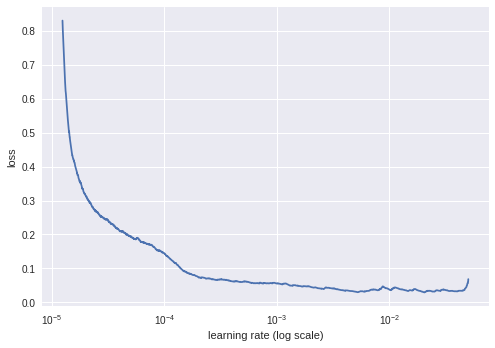

In [88]:
m.sched.plot(100)

Sample

In [0]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1,
                  [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [90]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.013289   0.01458    0.114693  
    1      0.010569   0.014326   0.109877  
    2      0.010326   0.013052   0.106557  


[array([0.01305]), 0.10655684016608058]

In [91]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.006911   0.011108   0.098967  
    1      0.007372   0.010873   0.098514  
    2      0.006522   0.010778   0.098705  
    3      0.007323   0.010637   0.098133  
    4      0.006783   0.010758   0.098337  


[array([0.01076]), 0.09833699110468443]

In [92]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.008206   0.011606   0.100563  
    1      0.006647   0.010807   0.099573  
    2      0.006327   0.010865   0.097912  
    3      0.005449   0.010733   0.09774   
    4      0.00743    0.01184    0.101905  
    5      0.006488   0.011895   0.102105  
    6      0.005916   0.010908   0.098926  
    7      0.005703   0.01086    0.099011  


[array([0.01086]), 0.09901103996115679]

All

In [0]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1,
                  [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [94]:
m.fit(lr, 1, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.01404    0.014175   0.116268  


[array([0.01418]), 0.11626844395326233]

In [95]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.010276   0.014102   0.108818  
    1      0.009779   0.011939   0.106792  
    2      0.009202   0.012133   0.103377  


[array([0.01213]), 0.10337652102830498]

In [96]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.006777   0.010713   0.097743  
    1      0.006994   0.01053    0.097197  
    2      0.007004   0.010405   0.096876  


[array([0.01041]), 0.09687589909793261]

Test

In [0]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars), 0.04, 1,
                  [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [98]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.013434   0.022213   0.130498  
    1      0.01119    0.013571   0.108871  
    2      0.009489   0.012672   0.106217  


[array([0.01267]), 0.1062167651179827]

In [99]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.007188   0.011119   0.099997  
    1      0.007662   0.010939   0.099681  
    2      0.006918   0.010887   0.099124  


[array([0.01089]), 0.09912448085650448]

In [0]:
m.save('val0')

In [0]:
m.load('val0')

In [0]:
x,y=m.predict_with_targs()

In [103]:
exp_rmspe(x,y)

0.10243060415970821

In [0]:
pred_test = m.predict(True)

In [0]:
pred_test = np.exp(pred_test)

In [0]:
joined_test['Sales']=pred_test

In [0]:
csv_fn = f'{PATH}tmp/sub.csv'

In [0]:
joined_test[['Id', 'Sales']].to_csv(csv_fn, index=False)

In [109]:
FileLink(csv_fn)

/content/tmp/sub.csv

RF

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [112]:
mrf = RandomForestRegressor(n_estimators=40, max_features=0.99,
                         min_samples_leaf=2, n_jobs=-1, oob_score=True)
mrf.fit(trn, y_trn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.99, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [113]:
preds_rf = mrf.predict(val)
mrf.score(trn, y_trn), mrf.score(val, y_val), mrf.oob_score_, exp_rmspe(preds_rf, y_val)

(0.9822634051368463,
 0.9314233199482773,
 0.9245173548757114,
 0.10888373077846375)